## Install beautiful soup 

In [1]:
%pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import requests
url = "https://www.flipkart.com/search?q=mobiles&as=on&as-show=on&otracker=AS_Query_TrendingAutoSuggest_1_0_na_na_na&otracker1=AS_Query_TrendingAutoSuggest_1_0_na_na_na&as-pos=1&as-type=HISTORY&suggestionId=mobiles&requestId=e45f70dd-cbc3-4d01-9442-ed7d1a87c355"
response = requests.get(url)
response

<Response [200]>

In [3]:
response.content

b'<!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.615ed9.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.

## Webscraping Opindia Website 

In [5]:
url = "https://www.opindia.com/latest-news/?nocache"
response = requests.get(url)
response

<Response [200]>

<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Today's Latest English News Reports from India | Archives of OpIndia</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<link href="https://www.opindia.com/latest-news/?nocache" rel="canonical"/><link href="https://www.opindia.com/latest-news/page/2/?nocache" rel="next"/><link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content="Latest Breaking News and Opinions from OpIndia.com. List of all news reports and opinions published by OpIndia in a chronological order." name="description"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Today's Latest English News Reports from India | Arch
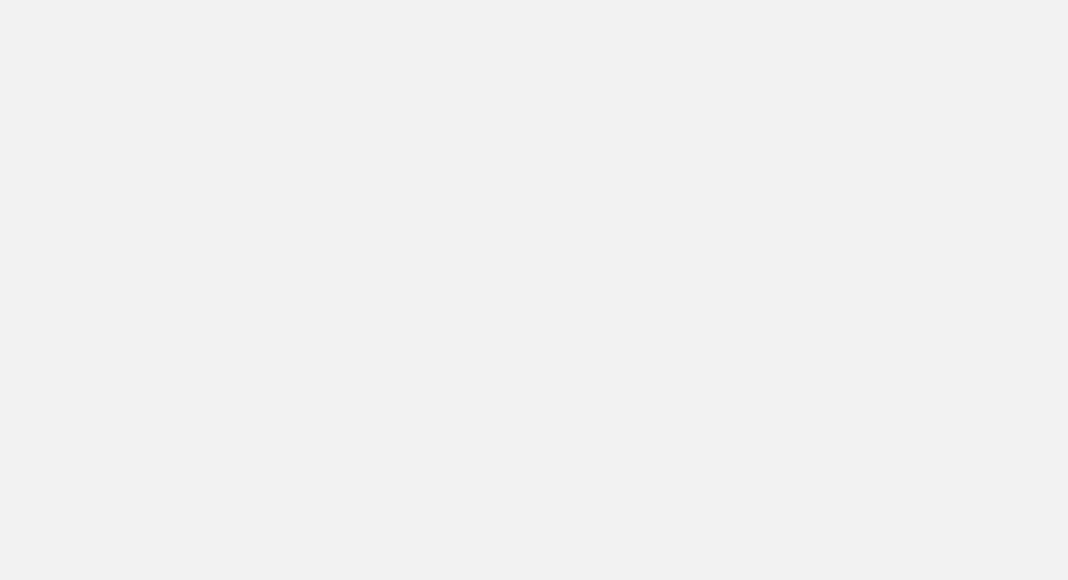

In [6]:
from bs4 import BeautifulSoup
bs = BeautifulSoup(response.content)
bs

In [8]:
headings = bs.find_all('h3', class_="entry-title td-module-title")
headings[0:5]

[<h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/maharashtra-congress-rejects-uddhav-senas-demand-for-23-seats-for-lok-sabha-elections/" rel="bookmark" title="Maharashtra: ‘What will they do with the seats?’ asks Congress as it rejects Uddhav Sena’s demand for 23 seats for Lok Sabha elections">Maharashtra: ‘What will they do with the seats?’ asks Congress as it rejects Uddhav Sena’s demand for 23 seats for Lok Sabha elections</a></h3>,
 <h3 class="entry-title td-module-title"><a href="https://www.opindia.com/2023/12/ed-confirms-opindias-2019-newsbreak-names-priyanka-gandhi-vadra-in-charge-sheet-for-dubious-land-deals-and-sanjay-bhandari-links/" rel="bookmark" title="ED now confirms OpIndia’s 2019 newsbreak, names Priyanka Gandhi Vadra in charge sheet highlighting dubious land deals and Sanjay Bhandari links">ED now confirms OpIndia’s 2019 newsbreak, names Priyanka Gandhi Vadra in charge sheet highlighting dubious land deals and Sanjay Bhandari links</a>

In [10]:
headings[0].text

'Maharashtra: ‘What will they do with the seats?’ asks Congress as it rejects Uddhav Sena’s demand for 23 seats for Lok Sabha elections'

In [11]:
headings[0].find('a').get('href')

'https://www.opindia.com/2023/12/maharashtra-congress-rejects-uddhav-senas-demand-for-23-seats-for-lok-sabha-elections/'

## Webscraping all headlines and urls 

In [12]:
def get_headings_and_links(url):
    import requests
    response = requests.get(url)
    from bs4 import BeautifulSoup
    bs = BeautifulSoup(response.content)
    headings = bs.find_all('h3', class_="entry-title td-module-title")
    headline = []
    links = []
    for i in headings:
        h = i.text
        headline.append(h)
        l = i.find('a').get('href')
        links.append(l)
    return headline, links

In [13]:
url

'https://www.opindia.com/latest-news/?nocache'

In [14]:
headlines, links = get_headings_and_links(url)

In [15]:
headlines[0:5]

['Maharashtra: ‘What will they do with the seats?’ asks Congress as it rejects Uddhav Sena’s demand for 23 seats for Lok Sabha elections',
 'ED now confirms OpIndia’s 2019 newsbreak, names Priyanka Gandhi Vadra in charge sheet highlighting dubious land deals and Sanjay Bhandari links',
 '‘Make Mayawati PM candidate if you want BSP in I.N.D.I. Alliance’, says BSP MP Malook Nagar',
 'DMDK chief Vijayakanth passes away at 71 in Chennai, the actor-politician was getting treatment for pneumonia',
 'As goons attack shops over ‘smaller Kannada fonts’ on signboards in Bengaluru, here is how Karnataka Congress leaders have been fanning the language divide...']

## Fetching new data and article 

In [16]:
links[0]

'https://www.opindia.com/2023/12/maharashtra-congress-rejects-uddhav-senas-demand-for-23-seats-for-lok-sabha-elections/'

In [17]:
response2 = requests.get(links[0])
response2

<Response [200]>

<!DOCTYPE html>
<html lang="en-GB">
<head>
<meta charset="utf-8"/>
<title>Uddhav Sena's demand for 23 seats for Lok Sabha elections turned down by Congress: Reports</title>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://www.opindia.com/xmlrpc.php" rel="pingback"/>
<meta content="index, follow, max-image-preview:large, max-snippet:-1, max-video-preview:-1" name="robots"/>
<link href="https://www.opindia.com/wp-content/uploads/2018/10/opindia-logo-300x300.png" rel="icon" type="image/png"/>
<meta content='Sanjay Nirupam stated that leaders ought to prevent conflicts over winning seats. "The Shiv Sena may demand 23 seats, but what will they do with them?" | OpIndia News' name="description"/>
<link href="https://www.opindia.com/2023/12/maharashtra-congress-rejects-uddhav-senas-demand-for-23-seats-for-lok-sabha-elections/" rel="canonical"/>
<meta content="en_GB" property="og:locale"/>
<meta content="article" property="og:type"/>
<meta content="Udd
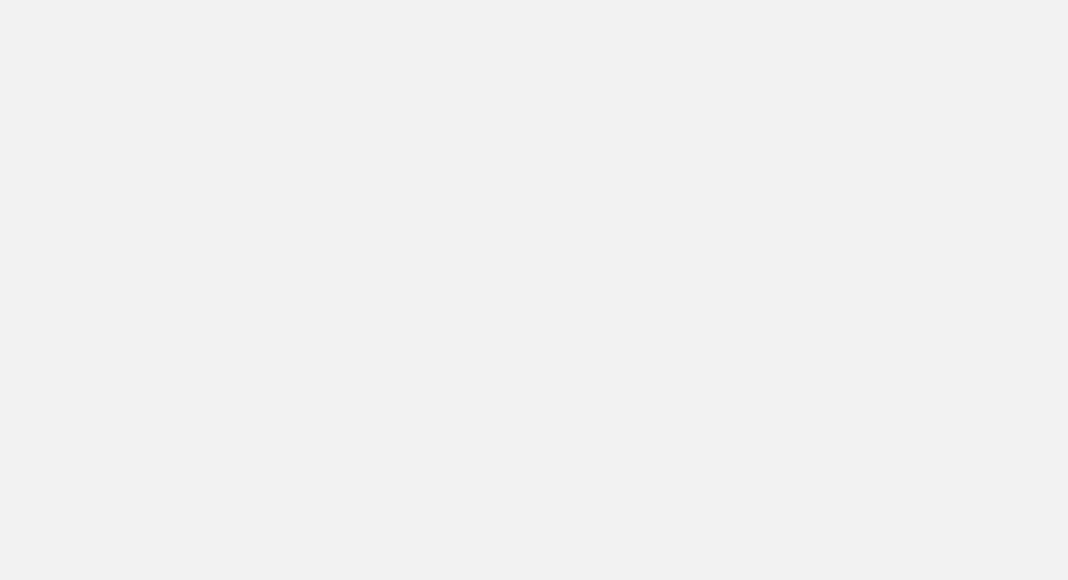

In [18]:
bs2 = BeautifulSoup(response2.content)
bs2

## Write a function to fetch news dates and articles for provided links 

In [19]:
def get_news_date_and_article(links):
    import requests
    from bs4 import BeautifulSoup
    dates = []
    news = []
    for i in links:
        response2 = requests.get(i)
        bs2 = BeautifulSoup(response2.content)
        d = bs2.find('time', class_="entry-date updated td-module-date")
        dates.append(d.text)
        para = bs2.find_all('p')
        n = ""
        for j in para:
            n = n + j.text
        news.append(n) 
    return dates, news

In [20]:
links[0:5]

['https://www.opindia.com/2023/12/maharashtra-congress-rejects-uddhav-senas-demand-for-23-seats-for-lok-sabha-elections/',
 'https://www.opindia.com/2023/12/ed-confirms-opindias-2019-newsbreak-names-priyanka-gandhi-vadra-in-charge-sheet-for-dubious-land-deals-and-sanjay-bhandari-links/',
 'https://www.opindia.com/2023/12/bsp-will-join-i-n-d-i-alliance-if-mayawati-is-made-pm-candidate-mp-malook-nagar/',
 'https://www.opindia.com/2023/12/dmdk-chief-actor-politician-vijayakanth-passes-away-in-chennai/',
 'https://www.opindia.com/2023/12/here-is-how-congress-leaders-has-been-fanning-the-language-row-that-led-to-pro-kannada-violence/']

In [21]:
dates, news = get_news_date_and_article(links)

In [22]:
dates[0:5]

['28 December, 2023 ',
 '28 December, 2023 ',
 '28 December, 2023 ',
 '28 December, 2023 ',
 '27 December, 2023 ']

In [23]:
news[0]

'Former Chief Minister and senior Maharashtra Congress leader Ashok Chavan stated that the parties needed to adjust. "While every party desires a larger share of seats, the demand for 23 seats by the Shiv Sena was excessive given the current circumstances," he said.The Congress Party has rejected the Shiv Sena’s (UBT) demand for 23 seats in Maharashtra in the upcoming Lok Sabha elections. The development came after Maharashtra Vikas Aghadi partners Shiv Sena (UBT), Congress, and NCP met to talk about seat sharing for the Lok Sabha elections.Despite the majority of its members supporting CM\xa0Eknath Shinde’s faction, the UBT Sena reportedly demanded 23 of the 48 seats in Maharashtra. According to Congress leader Sanjay Nirupam, Uddhav Thackeray’s Shiv Sena faction faces an enormous obstacle because it lacks sufficient candidates due to the party’s division.Following the splits in the Shiv Sena and Sharad Pawar’s NCP, Congress representatives at the meeting stated unequivocally that the

In [24]:
len(links)

104

## create dataframes for all news articles 

In [25]:
def get_news_dataframe(url):
    # Get headlines and links
    headlines, links = get_headings_and_links(url)
    # Get news dates and articles
    dates, news = get_news_date_and_article(links)
    # Create a dictionary to get dataframe
    dct = {'Date':dates,
           'Headline':headlines,
           'Link':links,
           'article':news}
    # Create the dataframe
    import pandas as pd
    df = pd.DataFrame(dct)
    return df

In [26]:
url

'https://www.opindia.com/latest-news/?nocache'

In [27]:
df_news = get_news_dataframe(url)

In [28]:
df_news

,Date,Headline,Link,article
0,"28 December, 2023",Maharashtra: ‘What will they do with the seats...,https://www.opindia.com/2023/12/maharashtra-co...,Former Chief Minister and senior Maharashtra C...
1,"28 December, 2023","ED now confirms OpIndia’s 2019 newsbreak, name...",https://www.opindia.com/2023/12/ed-confirms-op...,This is the first time that ED has named Priya...
2,"28 December, 2023",‘Make Mayawati PM candidate if you want BSP in...,https://www.opindia.com/2023/12/bsp-will-join-...,"BSP MP Malook Nagar said, ""To effectively chal..."
3,"28 December, 2023",DMDK chief Vijayakanth passes away at 71 in Ch...,https://www.opindia.com/2023/12/dmdk-chief-act...,"A statement from the hospital said, ""Captain V..."
4,"27 December, 2023",As goons attack shops over ‘smaller Kannada fo...,https://www.opindia.com/2023/12/here-is-how-co...,"In May this year, just before the Assemby elec..."
...,...,...,...,...
99,"27 December, 2023",Even as Congress loses 3 out of 4 states after...,https://www.opindia.com/2023/12/congress-annou...,"As per reports, Rahul Gandhi said that the par..."
100,"27 December, 2023",Uttar Pradesh: Naib Tehsildar Ashish Gupta who...,https://www.opindia.com/2023/12/up-married-pol...,The matter came to light after he started to v...
101,"27 December, 2023",Karnataka: RSS leader gets booked for speech a...,https://www.opindia.com/2023/12/karnataka-rss-...,Bhat has become the target of a complaint file...
102,"27 December, 2023",NCPCR visits Madrasa Arabia Faizul Islam in Ch...,https://www.opindia.com/2023/12/ncpcr-visits-m...,"As per Kanoongo, the Madrasa Arabia Faizul Isl..."


In [29]:
df_news.to_csv('OpindiaNews.csv', index=False)

In [30]:
df_news.iloc[3, -1]

'A statement from the hospital said, "Captain Vijayakanth was on ventilatory support following his admission for pneumonia. Despite the best efforts of medical staff, he passed away in the morning on 28th December 2023."On Thursday (28th December), DMDK (Desiya Murpokku Dravida Kazhagam) chief, actor-politician Vijayakanth passed away at 71 in MIOT Hospital in Chennai, Tamil Nadu. He was admitted to the hospital on Tuesday, December 26, for pneumonia.A statement from the hospital said, “Captain Vijayakanth was on ventilatory support following his admission for pneumonia. Despite the best efforts of medical staff, he passed away in the morning on 28th December 2023.”DMDK founder Captain Vijaykanth passes away at a private hospital in Chennai. He was on ventilatory support following his admission for pneumonia. pic.twitter.com/xuvyYKV18eAccording to reports, he also tested positive for COVID-19 after hospitalisation and was kept on ventilatory support. Earlier, Vijayakanth was admitted t